In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
class RelevanceVectorRegression(object):
    def __init__(self, alpha=1., beta=1.):
        self.alpha = alpha
        self.beta = beta
    
    def _kernel(self, x, y):
        return np.exp(-10 * (x-y)**2)

    def fit(self, x, t, iter_max=1000):
        self.x = x
        self.t = t
        
        N = len(x)
        Phi = self._kernel(*np.meshgrid(x, x))
        self.alphas = np.zeros(N) + self.alpha
        for i in range(iter_max):
            params = np.hstack([self.alphas, self.beta])
            
            self.precision = np.diag(self.alphas) + self.beta * Phi.T.dot(Phi)
            self.covariance = np.linalg.inv(self.precision)
            self.mean = self.beta * self.covariance.dot(Phi.T).dot(t)
            
            gamma = 1 - self.alphas * np.diag(self.covariance)
            self.alphas = gamma / np.square(self.mean)
            self.alphas = np.clip(self.alphas, 0, 1e10)
            self.beta = (N - np.sum(gamma)) / np.sum((t - Phi.dot(self.mean)) ** 2)
            if np.allclose(params, np.hstack([self.alphas, self.beta])):
                break
            # print
#             self._print_params(i)
        else:
            print("parameters may not have coverged")
    
    def _print_params(self, iter):
        print("#############")
        print(f"iteration  : {iter}")
        print(f"alphas     : {self.alphas}")
        print(f"beta       : {self.beta}")
        print(f"precision  : {self.precision}")
        print(f"covariance : {self.covariance}")
        print(f"mean       : {self.mean}")
        print("#############")
        return


    def predict_dist(self, x):
        K = self._kernel(*np.meshgrid(x, self.x, indexing='ij'))
        mean = K.dot(self.mean)
        var = 1 / self.beta + np.sum(K.dot(self.covariance) * K, axis=1)
        return mean, np.sqrt(var)

In [40]:
def create_toy_data(func, low=0., high=1., n=10, std=0.1):
    x = np.random.uniform(low, high, n)
    t = func(x) + np.random.normal(scale=std, size=n)
    return x, t

In [41]:
def func(x):
    return np.sin(2 * np.pi * x)

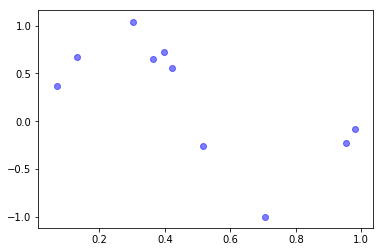

In [42]:
x, t = create_toy_data(func, n=10)
plt.scatter(x, t, color="blue", alpha=0.5, label="observation")

In [43]:
regression = RelevanceVectorRegression()
regression.fit(x, t, 10)
relevance_vector = np.abs(regression.mean) > 0.1

parameters may not have coverged


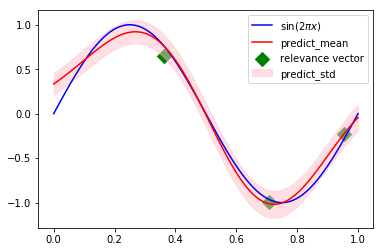

In [44]:
x_test = np.linspace(0, 1, 100)
plt.scatter(x[relevance_vector], t[relevance_vector], color="green", s=100, marker="D", label="relevance vector")
plt.plot(x_test, func(x_test), color="blue", label="sin($2\pi x$)")
y, y_std = regression.predict_dist(x_test)
plt.plot(x_test, y, color="red", label="predict_mean")
plt.fill_between(x_test, y - y_std, y + y_std, color="pink", alpha=0.5, label="predict_std")
plt.legend()
plt.show()

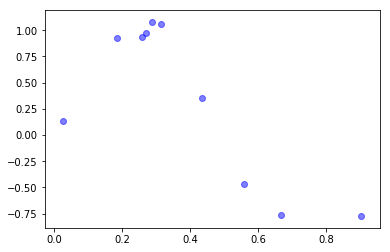

In [23]:
plt.scatter(x, t, color="blue", alpha=0.5, label="observation")

In [38]:
y

array([ 0.48901316,  0.5082465 ,  0.52735476,  0.54626458,  0.56489966,
        0.58318105,  0.60102733,  0.61835495,  0.6350785 ,  0.65111103,
        0.66636441,  0.68074967,  0.69417739,  0.70655811,  0.71780276,
        0.72782306,  0.73653203,  0.74384445,  0.74967731,  0.75395039,
        0.75658673,  0.75751317,  0.75666091,  0.75396604,  0.74937009,
        0.74282061,  0.73427168,  0.72368447,  0.71102778,  0.69627851,
        0.67942222,  0.6604535 ,  0.63937647,  0.6162051 ,  0.59096361,
        0.56368671,  0.5344198 ,  0.50321919,  0.47015214,  0.43529687,
        0.39874247,  0.36058878,  0.3209461 ,  0.27993483,  0.23768509,
        0.19433611,  0.15003567,  0.10493931,  0.0592096 ,  0.01301516,
       -0.03347025, -0.08006878, -0.12659963, -0.1728802 , -0.21872727,
       -0.26395826, -0.30839249, -0.35185243, -0.39416498, -0.43516268,
       -0.47468497, -0.5125793 , -0.54870225, -0.58292058, -0.61511216,
       -0.64516684, -0.6729872 , -0.69848917, -0.72160257, -0.74